# Final Project Vertically Driven Damped Planar Pendulum

Name: Manav Bilakhia

Date: 31st October 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from math import remainder, tau

# The Numerical Method

Here I have first defined my main computational tool that I will be using throughout, Runge-Kutta 4 (RK4)

In [2]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0 for i in range(N+1)])
    x_n = np.array([x0 for i in range(N+1)])
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n[i] = np.array([ t]) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n[i] = np.array([np.array([x])])
    return x_n, t_n #returning the arrays

In [3]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.1, 10) #using RK4 method

I will use the RK4 to understand and the vertically damped driven planar pendulum and solve its second order differential equation of motion (refer to the proposal for the derivation of the equation)
 
$$
\ddot{\theta} = -[\alpha - \beta \cos(\tau)]\sin(\theta) - \gamma \dot{\theta}
$$

where,

$$
\alpha = \frac{g}{L \omega^2} = \left(\frac{\text{natural frequency}}{\text{driving frequency}}\right)^2, \hspace{.75in} \beta = \frac{A}{L} = \left(\frac{\text{Amplitude of driving}}{\text{length of pendulum}}\right), \hspace{.75in} \gamma = \frac{\tilde{\gamma}}{\omega} = \left(\frac{\text{damping parameter}}{\text{driving frequency}}\right)
$$



# Checks

First and foremost, let us test our RK4 function on this system by setting the driving strength $\beta$, damping term $\gamma$ to 0 and set $\alpha$ to 1 such that the system resonates thereby essentially making it a simple pendulum. As we graph this, we should expect the position vs time graph to look similar to sine function with its amplitude at $\frac{\pi}{2}$ with a time period of $2\pi$  We should also expect the Velocity vs time graph to be similar to a cosine curve with the same amplitude time period. Both of these graphs will complete 1 oscillation at $\frac{5\pi}{2}$ as I have introduced a phase shift of $\frac{\pi}{2}$

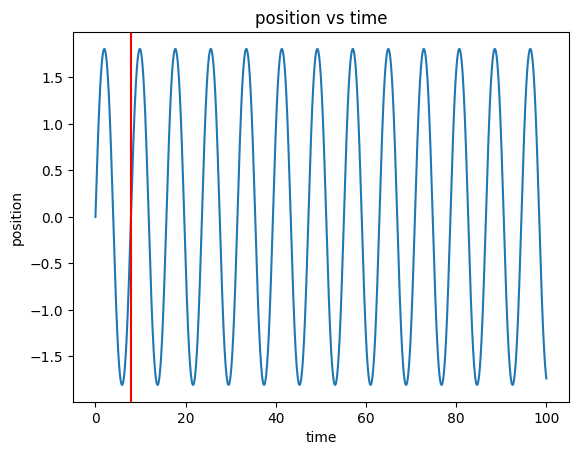

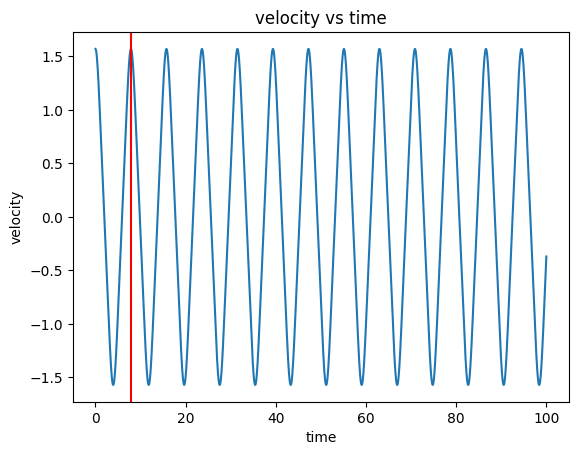

In [4]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
v_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

plt.plot(t_n4, v_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("velocity") #ylabel
plt.title("velocity vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

The graphs behave exactly as we predicted in the situation where there is no damping and driving force. Hence we know that our function for the vertically driven damped planar pendulum works. The red line shows our estimation for the time  period which seems a colse approximation bsed on the initial conditions we have defined. Here we also see that our amplitude is approximately 1.8 which is more than $\frac{\pi}{2}$. This measns that the the swing of this pendulum is quite substantial and it goes way above the horizontal. 
Let us now add a some damping force and we should be able to see a sine curve with a gradually decreasing amplitude

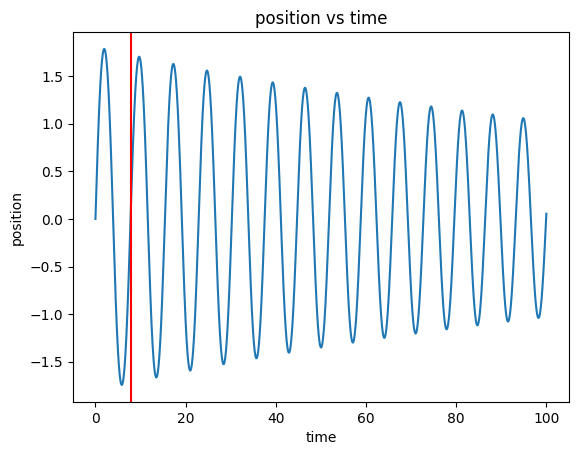

In [5]:
alpha = 1    #frequency                     
beta = 0     #driving force                                   
gamma = 0.01 #damping force                                 
x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

We were able to predict the behavior again which means that the damping part of our equation works. Here we also see that the period is actually slightly decreasing as the size of the oscillation decreases. This is because because of the relationship between period and amplitude for a pendulum is of direct proportionality. The next thing we will check is the driving force and how it counters the damping. The values $\alpha = 0.5, \beta = 0.1, \gamma = 0.03$ correspond to the stability of the downward state for the system. We will not plot the position vs time graph for these parameters. 

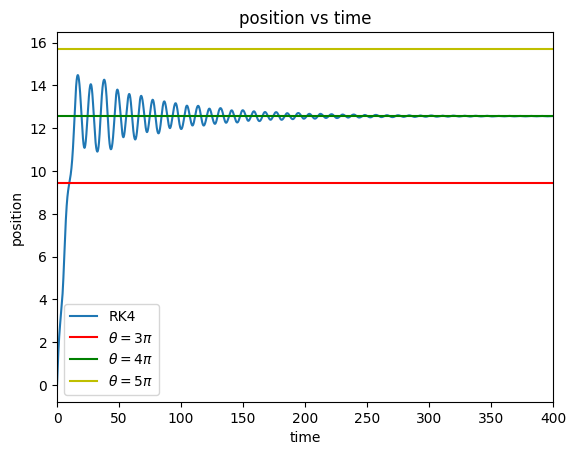

In [6]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,math.pi/2],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #multiple of pi
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$") #multiple of pi
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$") #multiple of pi
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.xlim(0, 400) #xrange
plt.legend()
plt.show()

In the plot above, I have changes the initial conditions such that there is a very big transient after which the plot seems to settle into its normal sinusoidal form with the amplitude almost being the same for all the other peaks outside of the transient. It is also worth noting that the pendulum dies down at around $4\pi$ as the pendulum swung around two complete circles before settling down. 


I shall now set the values of $\alpha = 0.1, \beta = 0.545, \gamma = 0.08$. These values correspond to a stable configuration for the upside-down pendulum.

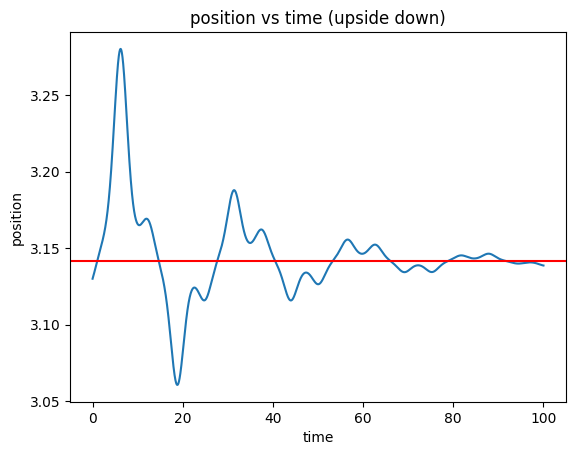

In [7]:
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01], 0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$")
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (upside down)") #title
plt.show()

Here we see that the transient behavior dies out pretty soon and we see that the oscillation does settle down after a bit. The initial condition is set very close to $\pi$ in order to explore the upside down stability
I shall now set the values of $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$.  we have stability for both
the upward and downward position of the pendulum. For the downward position, I will set my initial condition to 0 and for the upward one, I will set it to $\pi$

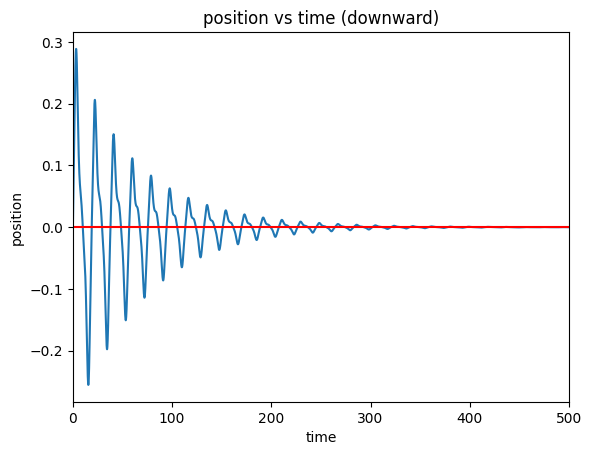

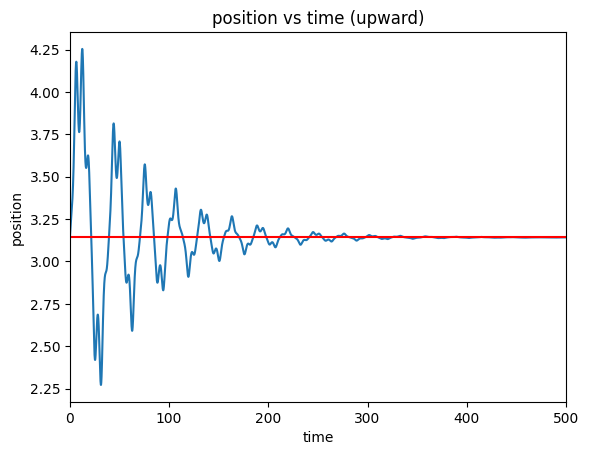

In [8]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (downward)") #title
plt.xlim(0, 500) #xrange
plt.show()

alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [math.pi,0.1],  0.001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = pi
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time (upward)") #title
plt.xlim(0, 500)  #xrange
plt.show()

We have shown here that those initial conditions do make the pendulum stable after a small transient for both upward and downward.
So far, the pendulum has behaved in the exact predicted manner which suggests that our RK4 method and our equation of motion hold true. 

# Phase Diagrams (stability and attractors)

So far we know that this system has two equilibrium configurations: the downward position and the upward position. We will be examining these features at different parameters (starting conditions and parameters). At this different parameters, we will also examine the different attractors at each of these parameters

# Examining the downward state of the pendulum

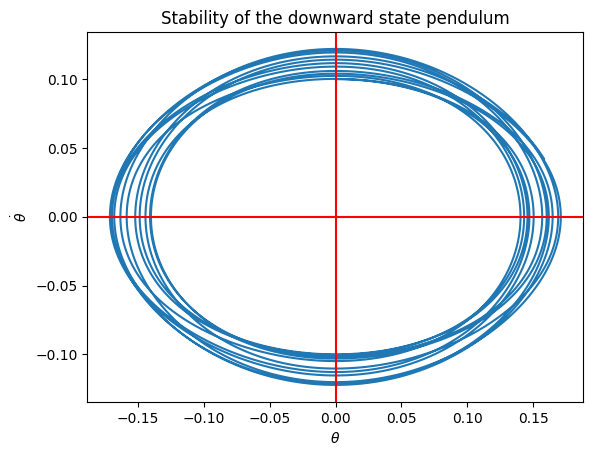

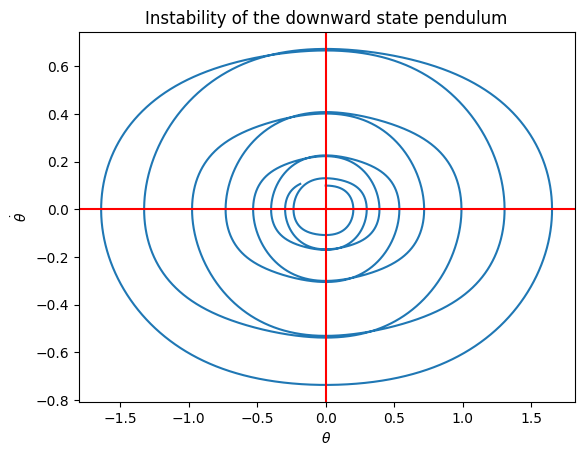

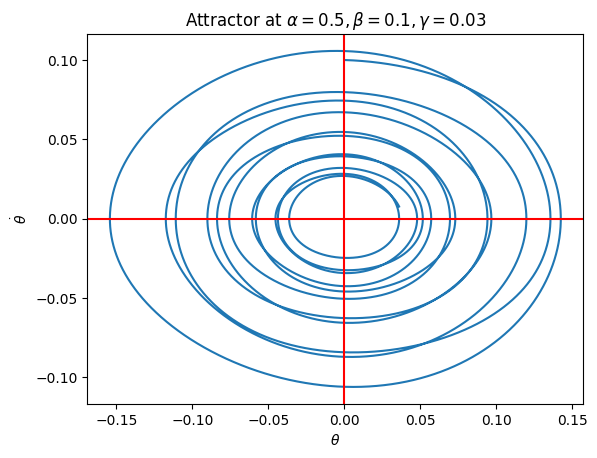

In [9]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the downward state pendulum") #title
plt.show()

alpha = 0.25  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.0 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the downward state pendulum") #title
plt.show()

alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,0.1],  0.0001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractor at $\\alpha =0.5, \\beta = 0.1, \\gamma = 0.03 $") #title
plt.show()

We first graph the phase map that shows stability. Since we have non dimensionalized our equation of motion, $\dot{\theta}$ is essentially our dimensionless momentum. Thereby we are essentially graphing momentum vs position. The uniform circle we see in graph one basically shows stability. I could graph more such concentric circles which would show multiple attractors. 

I have also shown an unstable version at slightly different parameters. 

The last graph shows the attractor. Here I have left out the transient in the graph and we also that since this is the downward equilibrium, th concentric circles at (0,0)

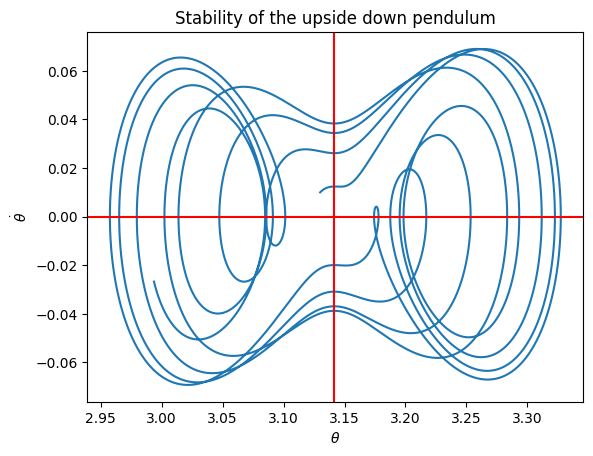

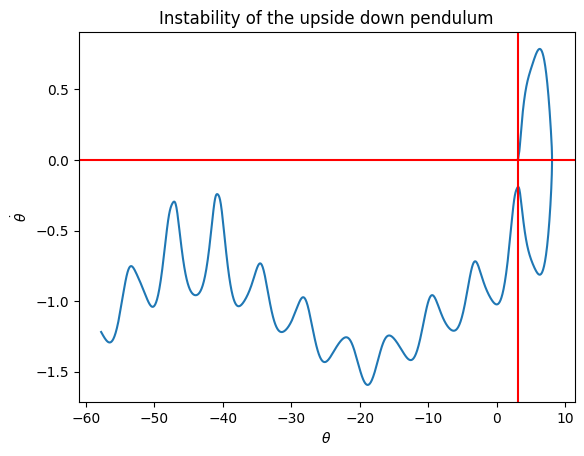

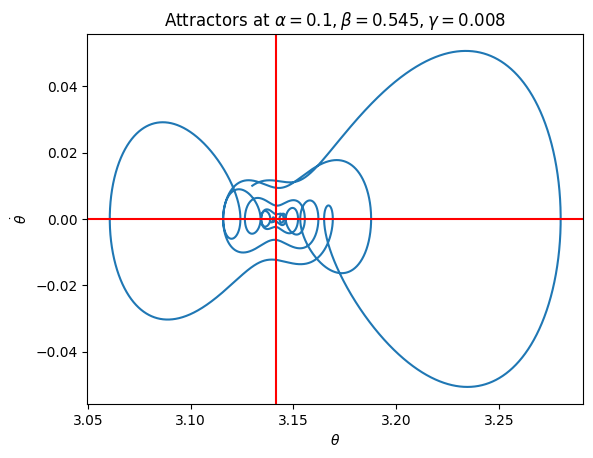

In [10]:
def f3(x_n,t): #mathematical function
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Stability of the upside down pendulum") #title
plt.show()

alpha = 0.2  #frequency                             
beta = 0.1  #driving force                               
gamma = 0.0  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Instability of the upside down pendulum") #title
plt.show()

alpha = 0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [3.13,0.01],  0.0001, 1000000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("Attractors at $\\alpha = 0.1, \\beta = 0.545, \\gamma = 0.008$") #title
plt.show()

We again follow the same method of making a stable. unstable and an attractors graph. here the parameters we use are at the upward stability hence our graphs are centered around (pi, 0). Here I have left the transient in so that we could see how it goes to the point (pi, 0). 

1 down
2 down
3 down
4 down
5 down
6 down


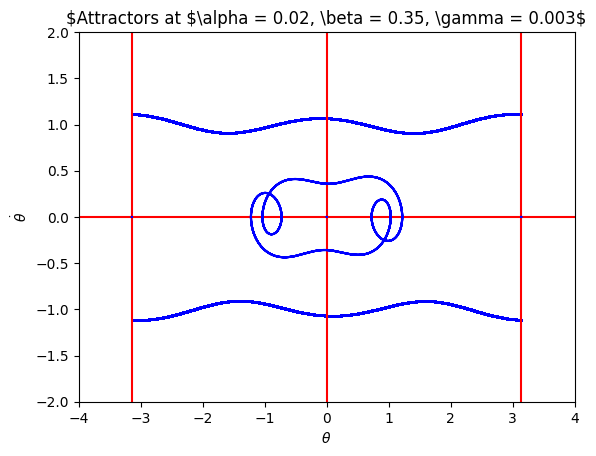

In [11]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [0,0.5],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axhline(y = 0, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$") #y = 0
plt.axvline(x = math.pi, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("1 down") 

x_n4, t_n4 = Rk4(f3, [0,0.4],  0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axvline(x = 0, color = 'r', label = 't = $4x_{0}$') # x = 0
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("2 down")

x_n4, t_n4 = Rk4(f3, [-math.pi,0.1], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.axvline(x = -math.pi, color = 'r', label = 't = $4x_{0}$') #x = -pi
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("3 down")

x_n4, t_n4 = Rk4(f3, [0,0.370], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
plt.plot(x_vals4, y_vals4, label = "RK4",color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("4 down")

x_n4, t_n4 = Rk4(f3, [0,1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) - np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("5 down")

x_n4, t_n4 = Rk4(f3, [0,-1.5/1.35], 0.001, 1000000) #using RK4 method
x_vals4 = np.array([x_n4[i][0]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (900001,len (x_n4))])# getting position vals from the meshed list
x_vals4 = np.fmod(x_vals4,2*math.pi) + np.pi #getting it in the range [-pi,pi]
plt.scatter(x_vals4, y_vals4, label = "RK4",s=1,color = 'blue') #calculating and plotting the difference between analytical soln and RK4 soln
print("6 down")

plt.ylim(-2,2) #yrange
plt.xlim(-4,4)  #xrange
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("$Attractors at $\\alpha = 0.02, \\beta = 0.35, \\gamma = 0.003$") #title

plt.show()

Here, I have followed a slightly separate method to understand these particular parameters. These parameters correspond to the upward as well as downward stable position. I have directly removed the transient here and plotted each attractor individually on the same plot. There are 5 attractors in total at these parameter. Since this is both upward and downward stable we see some attractors at (0,0) and (pi, 0). I shall now try and understand what a basin of attractor is.

# Things I was supposed to submit this week (24/10/2022):

Have a better understanding of phase diagrams and the physics behind those

Read through the lecture notes provided to understand attractors, basin of attraction and phase diagrams. 

Finish the incomplete section on phasemaps along with the physics behind it. 

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma = 0$ it resembles a actual never dying pendulum. 

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma > 0$ it resembles a actual dying pendulum.

Look further into attractors and basin of attractions to understand these jargons more and from other readings, find out values for  $\alpha, \beta, \gamma $ where they show interesting behavior. 

I have performed checks to understand the behavior and make sure that the code that I have written is correct. I was not able to get a better insight into attractors and basin of attractions. Hence I have started working on phase diagrams. While I do not completely understand the physics behind it, the code is partially ready.

While I have coded the phase diagrams at a different interesting initial conditions. I still do not understand the physics behind it.

# Things I was supposed to submit this week (31/10/2022):

Have a better understanding of phase diagrams and the physics behind those

Read through the lecture notes provided to understand attractors, basin of attraction and phase diagrams. 

Finish the incomplete section on phasemaps along with the physics behind it. 

I have completed the incomplete section on phasemaps and have some understanding about the terms attractors and phasemaps. I still have to work on understanding basin of attractions and plot them.

# Aims for next week

I will try to understand what a basin of attraction is. 

I will write an algorithm to see what initial conditions lead to which particular attractor. 